In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')

# **0. 데이터 준비**

- **행정구** 단위까지 구분되어 있는 데이터로 군집화 수행

In [3]:
df = pd.read_csv("./datasets/final2.csv",encoding ="euc-kr")
df.head(10)

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,79,3,65,37,340,7,3,0,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,174,56,1,25,29,270,2,3,1,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,102,56,4,22,13,213,4,3,0,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,188,55,2,36,27,328,4,5,0,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,146,48,1,27,18,252,0,5,0,...,54,19106,27057,204193,134898,60985,54511,500750,9,2
5,광진구,185,38,3,26,21,221,2,4,0,...,54,17359,25131,123028,106294,45120,34141,351073,11,4
6,구로구,163,45,0,13,19,280,5,6,1,...,54,25890,29422,119016,133415,60825,48002,416570,13,5
7,금천구,122,30,1,34,12,178,3,6,0,...,54,11848,14124,77606,76374,36827,27093,243872,4,2
8,노원구,136,45,0,20,16,307,3,3,0,...,53,29100,49687,133684,166527,71351,59337,509686,16,6
9,도봉구,95,40,2,41,13,184,2,6,0,...,53,15953,23787,79509,100618,51773,43244,314884,8,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   갈비/삼겹살          25 non-null     int64  
 2   곱창/양구이전문        25 non-null     int64  
 3   기사식당            25 non-null     int64  
 4   기타고기요리          25 non-null     int64  
 5   냉면집             25 non-null     int64  
 6   닭/오리요리          25 non-null     int64  
 7   돌솥/비빕밥전문점       25 non-null     int64  
 8   두부요리전문          25 non-null     int64  
 9   버섯전문점           25 non-null     int64  
 10  별식/퓨전요리         25 non-null     int64  
 11  보리밥전문           25 non-null     int64  
 12  부대찌개/섞어찌개       25 non-null     int64  
 13  부페              25 non-null     int64  
 14  분식              25 non-null     int64  
 15  설렁탕집            25 non-null     int64  
 16  순두부전문           25 non-null     int64  
 17  쌈밥전문            25 non-null     int64

- 총 71개의 컬럼, 25개의 데이터(행, 행정구 단위)
    - 음식 업종 수(33개) + 변수(38개)
- 결측치는 존재하지 않는다.

# **1. 데이터 선택 & EDA**

In [5]:
### 일식 업종만 선택

df_fish = pd.concat([df.iloc[:,0],df.iloc[:,21],df.iloc[:,34:]],axis = 1)
df_fish.head()

,행정구,일식/수산물,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,993,2.049828e+07,1.219102e+06,1.989315e+06,7.353311e+06,6.772562e+06,1.644169e+06,1.519817e+06,1.694812e+07,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,352,1.181135e+07,1.002138e+06,1.215699e+06,3.062175e+06,3.721769e+06,1.422661e+06,1.386905e+06,1.206012e+07,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,193,6.666287e+06,4.432063e+05,5.618048e+05,1.753008e+06,2.060718e+06,8.383629e+05,1.009187e+06,6.967055e+06,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,490,1.285747e+07,1.006538e+06,1.045185e+06,4.138328e+06,3.929851e+06,1.365295e+06,1.372272e+06,1.278144e+07,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,330,1.093507e+07,5.414203e+05,7.535122e+05,4.559442e+06,2.941770e+06,1.031023e+06,1.107899e+06,1.131414e+07,...,54,19106,27057,204193,134898,60985,54511,500750,9,2


### **1-1. 데이터 세트의 왜곡 정도 낮추기**
- Scipy의 stats 모듈의 **skew()** 함수를 이용해 추출
- 반환 값이 1 이상인 경우 왜곡 정도가 높다고 판단
    - 상황에 따라 편차는 존재함
    - 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 **로그 변환**을 적용

In [6]:
### 데이터 왜곡 정도 확인
# 왜곡 정도가 1 이상인 컬럼들만 추출

from scipy.stats import skew

features_idx = df_fish.dtypes[df_fish.dtypes != 'object'].index
skew_features = df_fish[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

skew_features_top = skew_features[skew_features > 1]
print()
print(skew_features_top.sort_values(ascending = False))

전체 왜곡 정도: 0.762469

일식/수산물            2.416808
평균소득금액            2.257700
40~50대 생활인구_평일    1.631611
온라인대학             1.500000
총생활인구수_평일         1.388110
20~30대 생활인구_평일    1.360001
폐업점포영업개월          1.224739
대학교(전체)           1.211515
일반대학              1.179427
10대 생활인구_주말       1.080540
운영점포영업개월          1.054502
dtype: float64


In [7]:
### 로그 변환 적용

skewed = list(skew_features_top.index)

for ftr in skewed:
    df_fish[ftr] = np.log1p(df_fish[ftr])

df_fish.head()

,행정구,일식/수산물,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,6.901737,16.835851,1.219102e+06,1.989315e+06,15.810661,15.728390,1.644169e+06,1.519817e+06,1.694812e+07,...,3.951244,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,5.866468,16.284571,1.002138e+06,1.215699e+06,14.934636,15.129710,1.422661e+06,1.386905e+06,1.206012e+07,...,3.970292,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,5.267858,15.712574,4.432063e+05,5.618048e+05,14.376845,14.538566,8.383629e+05,1.009187e+06,6.967055e+06,...,3.970292,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,6.196444,16.369436,1.006538e+06,1.045185e+06,15.235803,15.184112,1.365295e+06,1.372272e+06,1.278144e+07,...,3.970292,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,5.802118,16.207485,5.414203e+05,7.535122e+05,15.332711,14.894522,1.031023e+06,1.107899e+06,1.131414e+07,...,4.007333,19106,27057,204193,134898,60985,54511,500750,9,2


- 데이터가 제대로 로그 변환 되었음을 확인할 수 있다.

In [8]:
### 데이터 왜곡 정도 재확인
# 왜곡 정도가 1 이상인 컬럼들만 추출

from scipy.stats import skew

features_idx = df_fish.dtypes[df_fish.dtypes != 'object'].index
skew_features = df_fish[features_idx].apply(lambda x:skew(x))
skew_features_top = skew_features[skew_features > 1]

print(skew_features_top.sort_values(ascending = False))

평균소득금액      1.509486
온라인대학       1.500000
일식/수산물      1.143940
폐업점포영업개월    1.083347
dtype: float64


- 여전히 왜곡 정도가 심한 변수들이 일부 존재함을 확인할 수 있다.

### **1-3. 스케일 조정**
- 데이터의 패턴이 결과에 직접적으로 영향을 미치는 비지도학습의 경우 데이터 스케일링이 선행되는 것이 권장된다.
- 피처 스케일링 방법 중 '정규화' 진행
    - MinMaxScaler로 평균과 표준편차를 재조정

In [9]:
### 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

feature_df = df_fish.iloc[:,1:] # feature data
feature_df = feature_df.drop(['상권변화지표'],axis = 1) # 불필요한 컬럼 제거

# 정규화
scaler = MinMaxScaler()
fish_norm = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합
fish_norm = pd.concat([pd.DataFrame(df_fish['행정구']),fish_norm],axis = 1)
fish_norm.head(3) # 표준화된 데이터 확인

,행정구,일식/수산물,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,1.000000,1.000000,0.778976,1.000000,1.000000,1.000000,0.820301,0.882004,0.953855,...,0.000000,0.651957,1.000000,0.650474,0.817843,0.607881,0.772363,0.755442,1.000000,1.000000
1,강동구,0.407892,0.586684,0.610513,0.542350,0.445640,0.546119,0.648389,0.768894,0.571712,...,0.075156,0.656185,0.602852,0.539599,0.625318,0.697997,0.670788,0.623690,0.275862,0.111111
2,강북구,0.065525,0.157835,0.176529,0.155524,0.092662,0.097951,0.194917,0.447448,0.173537,...,0.075156,0.165282,0.252250,0.221004,0.319959,0.409556,0.610192,0.313705,0.241379,0.000000


### **1-4. 각 속성 간의 상관도 확인**

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


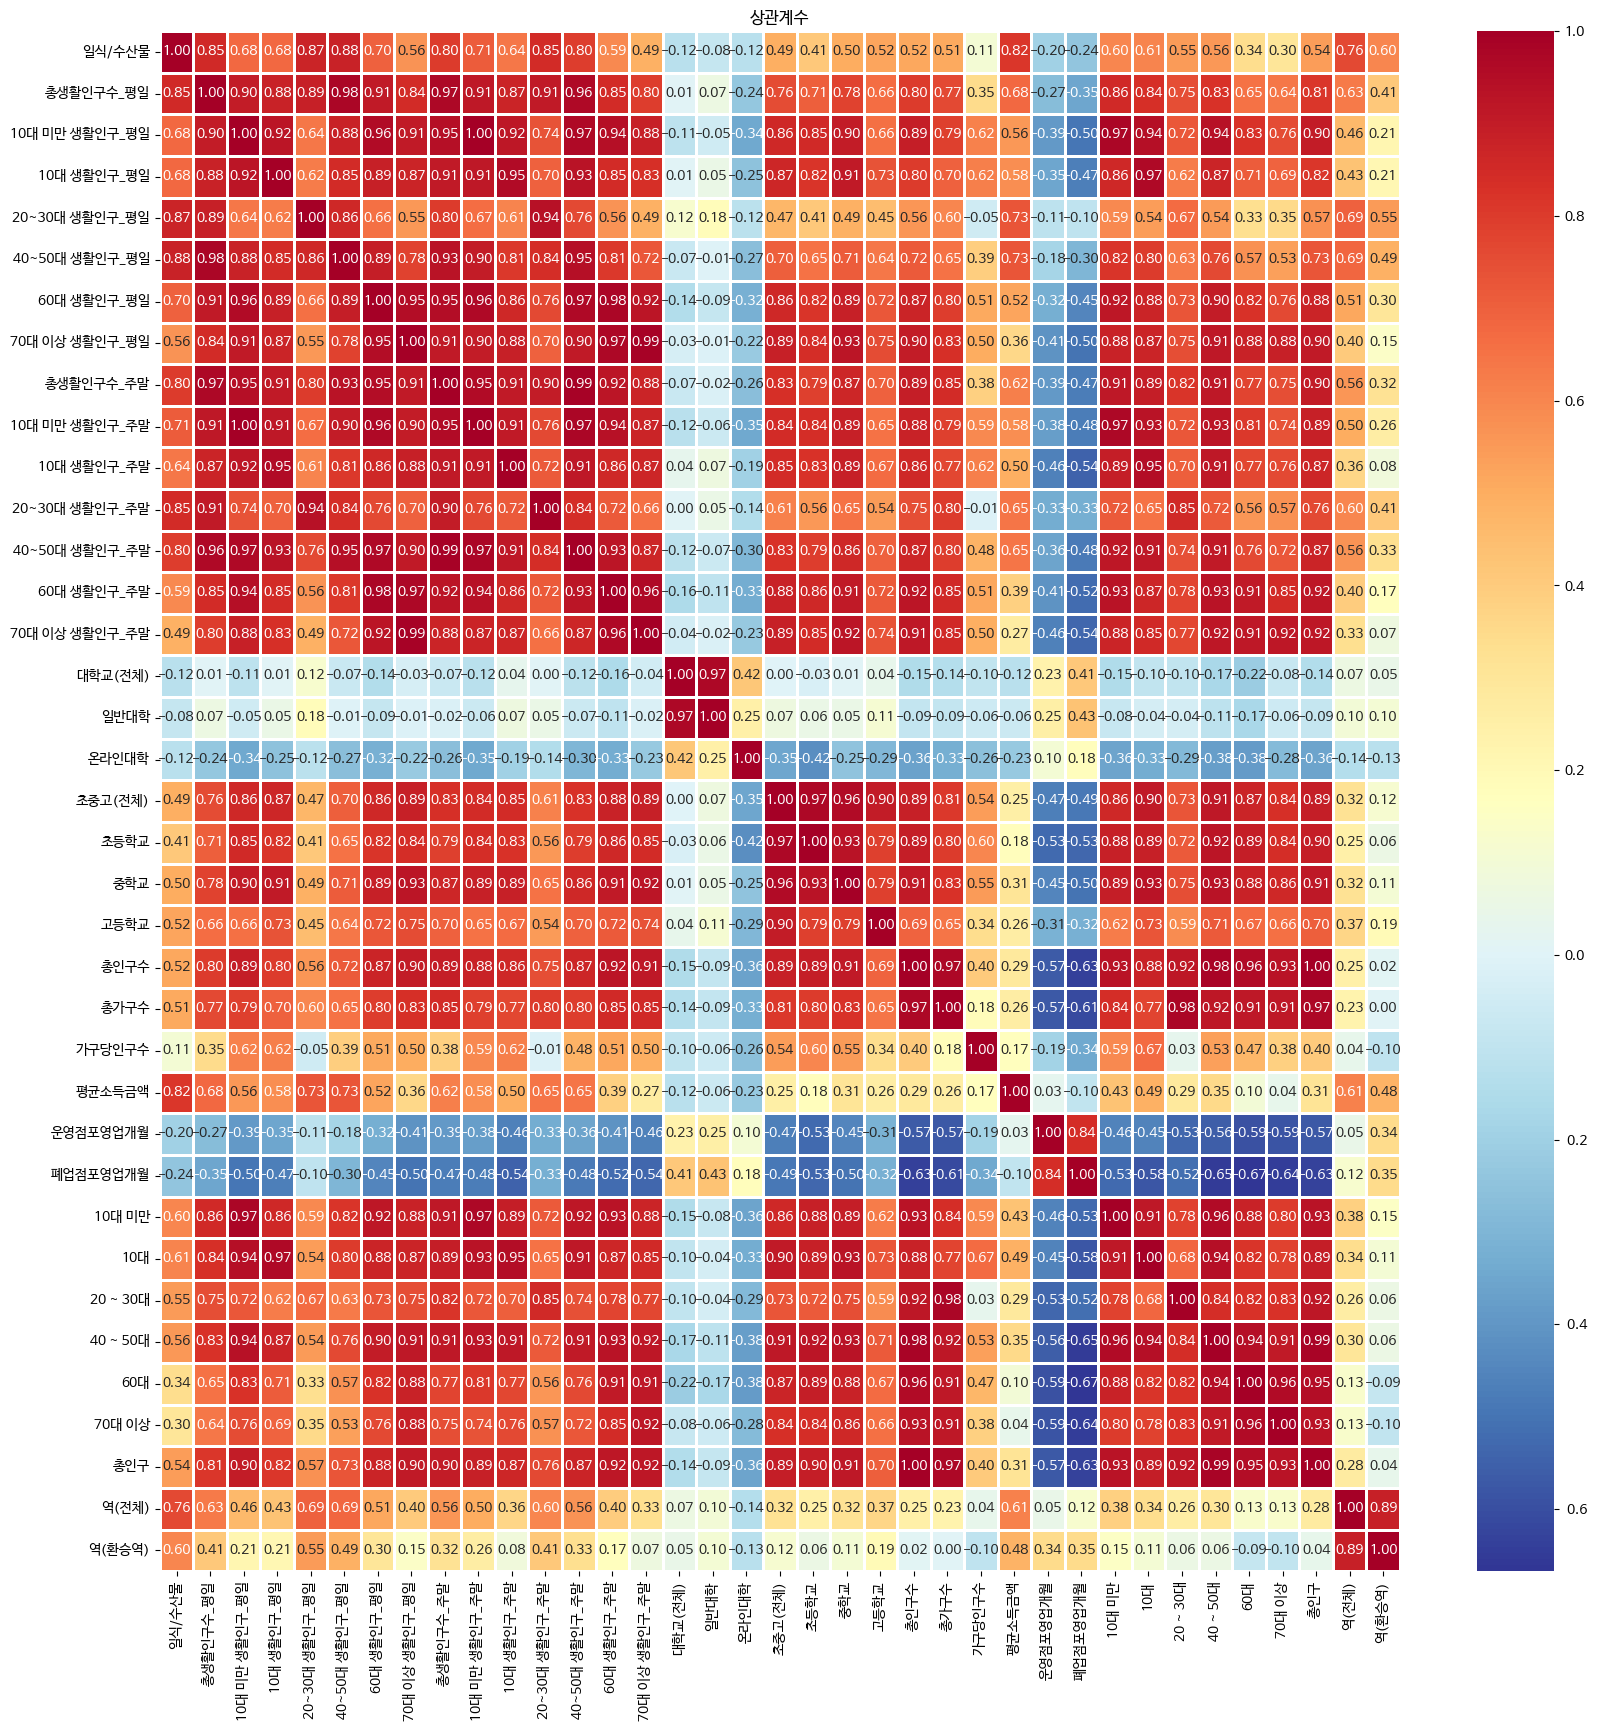

In [10]:
corr = df_fish.corr() # 상관계수

### 히트맵 사이즈 설정
plt.figure(figsize = (20,20))

### 시각화
sns.heatmap(data = corr, # 상관계수 테이블
           annot = True, # 히트맵에 상관계수 값 표시
           fmt = '.2f', # 소수 둘째자리까지 표시
           linewidths = 1., # 경계선
           cmap = 'RdYlBu_r') # colormap 지정
plt.title('상관계수')
plt.show()

- 대부분의 데이터들에서 변수들 간의 상관도가 높은 경향을 보인다.

### **1-5. 변수 선택**
- 모든 변수를 활용하되, PCA를 통해 데이터의 차원을 축소시킨 후 군집화 진행
    - 높은 상관도를 가지는 속성들의 경우 소수의 PCA만으로 각 속성들의 변동성을 모두 설명할 수 있음

In [11]:
### 적절한 주성분 개수 구하기

from sklearn.decomposition import PCA

data = fish_norm.iloc[:,2:] # 각 데이터 내의 모든 독립변수

# 독립변수는 전체 36개
# 0 <= n_components <= min(n_features,n_samples)여야 함
# 따라서, 25를 선택
pca = PCA(n_components = 25) 

pca_arr = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_arr,index = data.index,
                      columns = [f'pca{num+1}' for num in range(data.shape[0])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,2.270909,-0.759256,-0.655710,0.304825,-0.287437,0.073448,0.382680,0.056758,-0.135514,-0.163777,...,-0.036115,0.041342,-0.015234,-0.018338,0.009858,0.007237,0.003078,-0.000431,0.001562,1.369708e-16
1,0.996978,0.588062,-0.260018,0.217132,-0.384195,0.055175,-0.233817,0.151812,-0.155705,0.144543,...,0.075468,0.035230,-0.046319,0.022902,0.005139,-0.004651,-0.003896,0.001943,-0.001872,1.369708e-16
2,-1.026326,0.571198,0.438008,0.739004,-0.365125,-0.244628,-0.069013,-0.055202,-0.226231,-0.092845,...,-0.014513,-0.035080,0.003824,0.006291,-0.004318,0.004428,-0.004141,-0.004106,0.001618,1.369708e-16
3,1.593166,0.119755,0.180105,-0.025844,0.393494,-0.207109,0.269674,-0.045326,-0.018486,0.157765,...,0.046984,0.023831,-0.006941,-0.003161,-0.018485,0.002920,0.005846,-0.001816,0.006207,1.369708e-16
4,0.453361,0.271338,-0.021799,0.374722,0.968236,0.113710,-0.071069,0.479723,-0.077486,-0.094053,...,0.004214,-0.032772,-0.007401,-0.012724,-0.001439,0.002882,0.004056,0.000658,-0.003468,1.369708e-16


In [12]:
### 주성분의 설명력과 기여율 구하기

result = pd.DataFrame({'설명 가능한 분산 비율(고윳값)':pca.explained_variance_,
                      '기여율':pca.explained_variance_ratio_},
                     index = np.array([f'pca{num+1}' for num in range(data.shape[0])]))
result['누적기여율'] = result['기여율'].cumsum()
result.loc[result['누적기여율'] <= 0.9,:]

,설명 가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.482785,0.623651,0.623651
pca2,0.268086,0.112755,0.736406
pca3,0.205582,0.086467,0.822873
pca4,0.131526,0.055319,0.878192


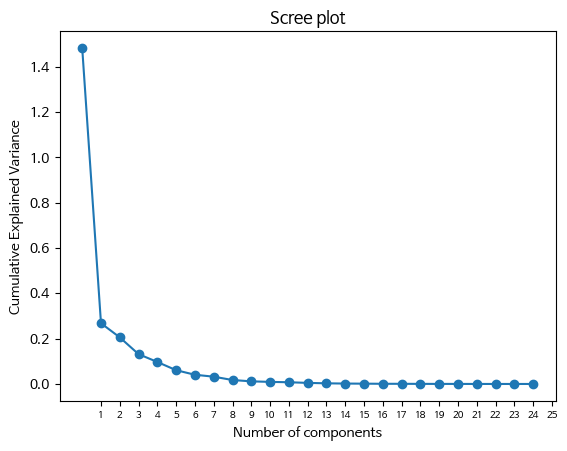

In [13]:
### Scree Plot

plt.title('Scree plot')
plt.xlabel('Number of components')
plt.xticks(range(1,26),fontsize = 7)
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_,'o-')

- 개별 고윳값(주성분마다의 고윳값)이 **0.7 이상**이고 누적 기여율이 **80% 이상**이 넘어가는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정
    - **제 5** 주성분까지 활용

In [14]:
### 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components = 5) # pca 객체 생성
pca.fit(fish_norm.iloc[:,2:]) # pca 학습
# 변환
data_pca = pd.DataFrame(data = pca.transform(fish_norm.iloc[:,2:]), 
                        columns=['var1', 'var2','var3','var4','var5'])
# 변환된 데이터 저장
fish_trans = pd.concat([pd.DataFrame(fish_norm[['행정구','일식/수산물']]),data_pca], axis = 1)
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


# **2. K-Means 군집화**

In [15]:
from sklearn.cluster import KMeans

### **2-1. 군집 개수 정하기**

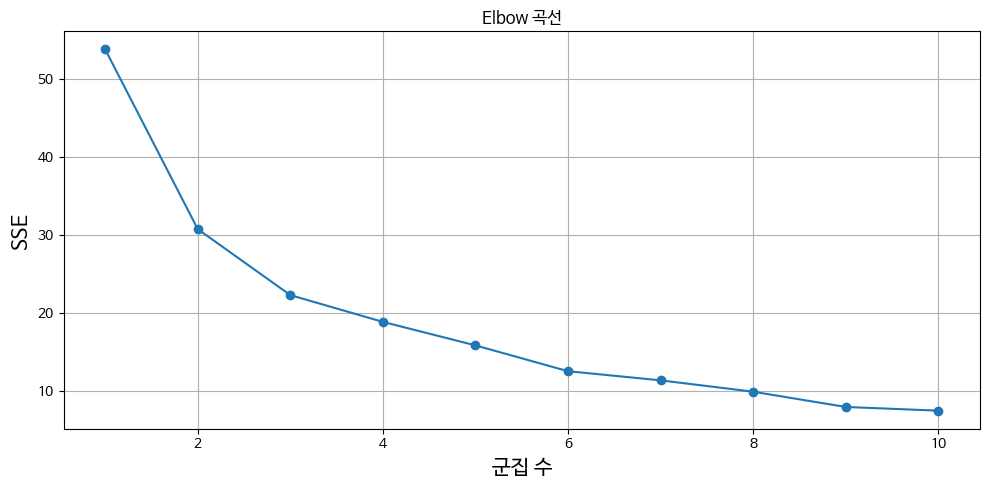

In [16]:
### Inertia, Elbow 구하기

# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집 개수 1~10까지 kmeans를 실행 => sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i, # 군집화 할 개수
               init = 'k-means++', # 초기에 군집 중심점의 좌표를 설정할 방식
               n_init = 10,
               max_iter = 300, # 최대 반복 횟수
               random_state = 0)
    km.fit(fish_trans.iloc[:,1:]) # '행정구' 컬럼 제거
    sse.append(km.inertia_)

# sse array 시각화   
plt.figure(figsize = (10,5))
plt.title('Elbow 곡선')
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('군집 수',fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

- **k = 3**일 때 급격한 거리의 변화가 일어난 것으로 보아 클러스터 수로 **3개**가 적절해 보인다.

### **2-2. K-Means 군집화 수행**

In [17]:
### 데이터를 3개의 그룹으로 군집화
# 군집화 시 행정구 컬럼은 필요 없으므로 제외

kmeans = KMeans(
    n_clusters = 3, 
    init = 'k-means++', 
    max_iter = 300, 
    random_state = 0)
kmeans.fit(fish_trans.iloc[:,1:])

KMeans(n_clusters=3, random_state=0)

In [18]:
### 각 행정구가 어느 군집화 중심에 속하는지 확인

fish_trans['cluster'] = kmeans.labels_ # 군집화 컬럼 추가
print(kmeans.labels_)
print()
print(len(kmeans.labels_))

[1 2 0 1 2 0 2 0 1 0 0 2 2 0 2 0 2 1 2 2 0 2 0 0 2]

25


In [19]:
### 군집화 결과 확인

df_result = fish_trans.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    10
1     4
2    11
Name: 행정구, dtype: int64


In [20]:
### 시각화
# 평면에 시각화를 위해 추가적인 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_trans.iloc[:,1:-1])

fish_trans['pca_x'] = pca_transformed[:,0]
fish_trans['pca_y'] = pca_transformed[:,1]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5,cluster,pca_x,pca_y
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437,1,2.348132,-0.894963
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195,2,0.998368,0.543481
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125,0,-1.053441,0.590709


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


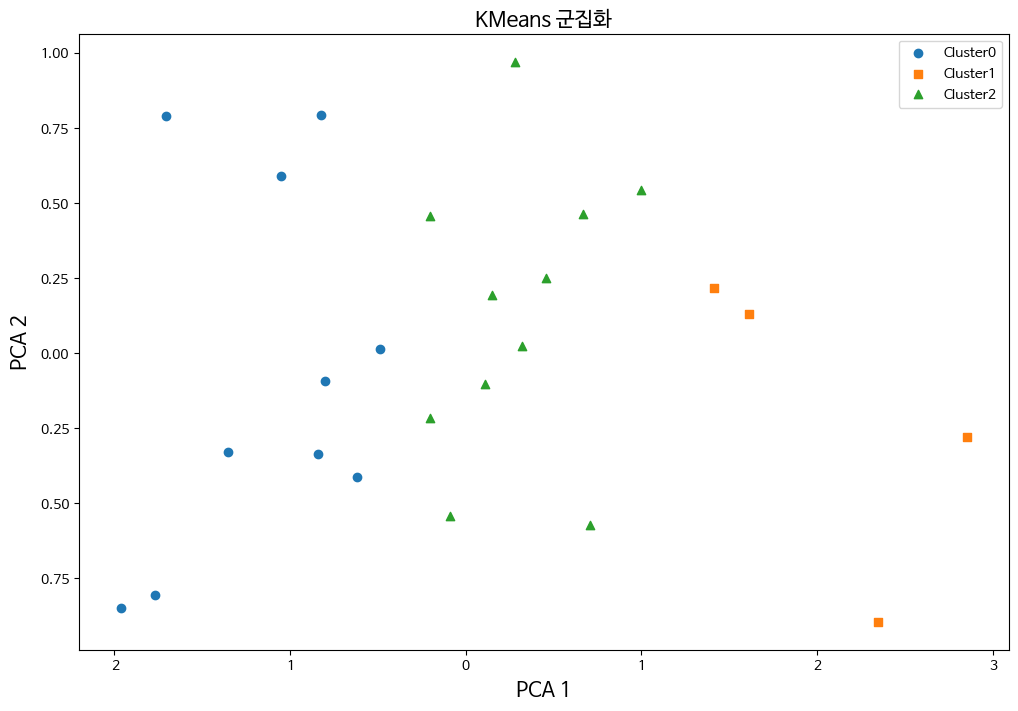

In [21]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_trans[fish_trans['cluster'] == 0].index
marker1_ind = fish_trans[fish_trans['cluster'] == 1].index
marker2_ind = fish_trans[fish_trans['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = fish_trans.loc[marker0_ind,'pca_x'],y = fish_trans.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_trans.loc[marker1_ind,'pca_x'],y = fish_trans.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_trans.loc[marker2_ind,'pca_x'],y = fish_trans.loc[marker2_ind,'pca_y'], marker='^')

plt.legend(['Cluster0','Cluster1','Cluster2'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('KMeans 군집화',size = 15)
plt.show()

In [22]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_trans.loc[fish_trans['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(fish_trans.loc[fish_trans['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))
print()

group2 = list(fish_trans.loc[fish_trans['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))

군집0: ['강북구', '광진구', '금천구', '도봉구', '동대문구', '서대문구', '성동구', '용산구', '종로구', '중구']

군집1: ['강남구', '강서구', '노원구', '송파구']

군집2: ['강동구', '관악구', '구로구', '동작구', '마포구', '서초구', '성북구', '양천구', '영등포구', '은평구', '중랑구']


### **2-3. 군집화 평가**

#### **a) 실루엣 계수**

In [23]:
### 실루엣 분석을 위한 API 추가

from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
### 모든 개별 데이터에 대해 실루엣 계수 값 구하기

score_samples = silhouette_samples(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (25,)


In [25]:
### 모든 데이터의 평균 실루엣 계수값 구하기

average_score = silhouette_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

실루엣 분석 점수: 0.246


In [26]:
### 실루엣 계수 컬럼 추가

fish_trans['silhouette_coef'] = score_samples
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5,cluster,pca_x,pca_y,silhouette_coef
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437,1,2.348132,-0.894963,0.355279
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195,2,0.998368,0.543481,0.226728
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125,0,-1.053441,0.590709,0.188471


In [27]:
### 군집별로 실루엣 계수의 평균값 구하기

fish_trans.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.206081
1    0.238449
2    0.284621
Name: silhouette_coef, dtype: float64

- 군집 간 실루엣 계수의 차이가 크지는 않다.
- 전체 실루엣 계수의 평균값이 낮은 편이다.

#### **b) Davies Bouldin Index**

In [28]:
### Davies Bouldin Index 계산을 위한 API 추가

from sklearn.metrics import davies_bouldin_score

In [29]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.826


# **3. 평균 이동**

### **3-1. 평균 이동 군집화 수행**

In [30]:
### 필요한 라이브러리 import

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [31]:
### 데이터 다시 준비

fish_trans = fish_trans.iloc[:,:7]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


In [32]:
### 최적 대역폭 계산
# estimate_bandwidth(feature_data): 최적화된 bandwidth를 찾기 위한 함수
# 군집화 시 '행정구','행정동'은 필요 없으므로 제외

h = estimate_bandwidth(fish_trans.iloc[:,1:])
print('bandwidth 값: ',round(h,3))

bandwidth 값:  1.384


In [33]:
### 평균 이동 군집화 수헹

ms = MeanShift(bandwidth = h)
cluster_labels = ms.fit_predict(fish_trans.iloc[:,1:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


- **2개**의 군집으로 분류되는 것을 확인할 수 있다.

In [34]:
### 각 행정동이 어느 군집에 속하는지 확인

fish_trans['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

25


In [35]:
### 군집화 결과 확인

df_result = fish_trans.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    22
1     3
Name: 행정구, dtype: int64


- 행정구들이 군집0에 편향된 것을 확인할 수 있다.

In [36]:
### 시각화
# 평면에 시각화를 위해 추가적인 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_trans.iloc[:,1:-1])

fish_trans['pca_x'] = pca_transformed[:,0]
fish_trans['pca_y'] = pca_transformed[:,1]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5,cluster,pca_x,pca_y
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437,1,2.348132,-0.894963
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195,0,0.998368,0.543481
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125,0,-1.053441,0.590709


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


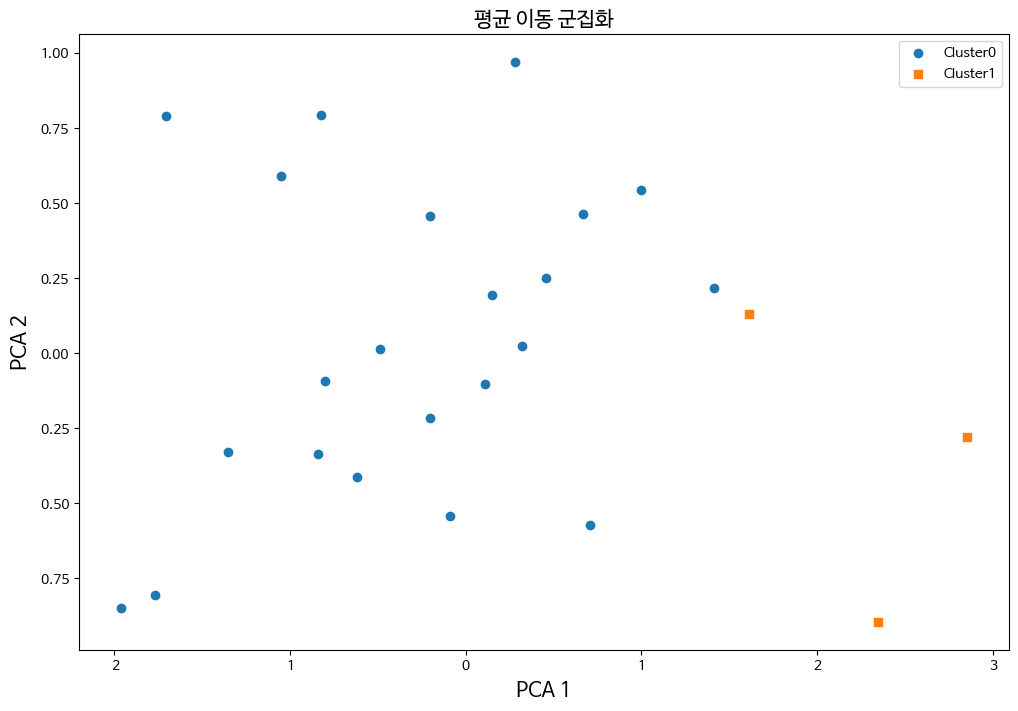

In [37]:
### 군집별 산점도 출력

# 군집 값이 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_trans[fish_trans['cluster'] == 0].index
marker1_ind = fish_trans[fish_trans['cluster'] == 1].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = fish_trans.loc[marker0_ind,'pca_x'],y = fish_trans.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_trans.loc[marker1_ind,'pca_x'],y = fish_trans.loc[marker1_ind,'pca_y'], marker='s')

plt.legend(['Cluster0','Cluster1'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('평균 이동 군집화',size = 15)
plt.show()

In [38]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_trans.loc[fish_trans['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(fish_trans.loc[fish_trans['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

군집0: ['강동구', '강북구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

군집1: ['강남구', '강서구', '송파구']


### **3-2. 군집화 평가**

#### **a) 실루엣 계수**

In [39]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(fish_trans.iloc[:,1:-3],fish_trans['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
fish_trans['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
fish_trans.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.389


cluster
0    0.373128
1    0.504142
Name: silhouette_coef, dtype: float64

- 전체 실루엣 계수의 평균값이 높은 편은 아니다.
- 군집 간의 실루엣 계수의 차이가 크지 않다.

#### **b) Davies Bouldin Index**

In [40]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.685


# **4. 병합 군집**

In [41]:
### 데이터 다시 준비

fish_trans = fish_trans.iloc[:,:7]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


### **4-1. 여러 클러스터 병합 방식 적용하기**

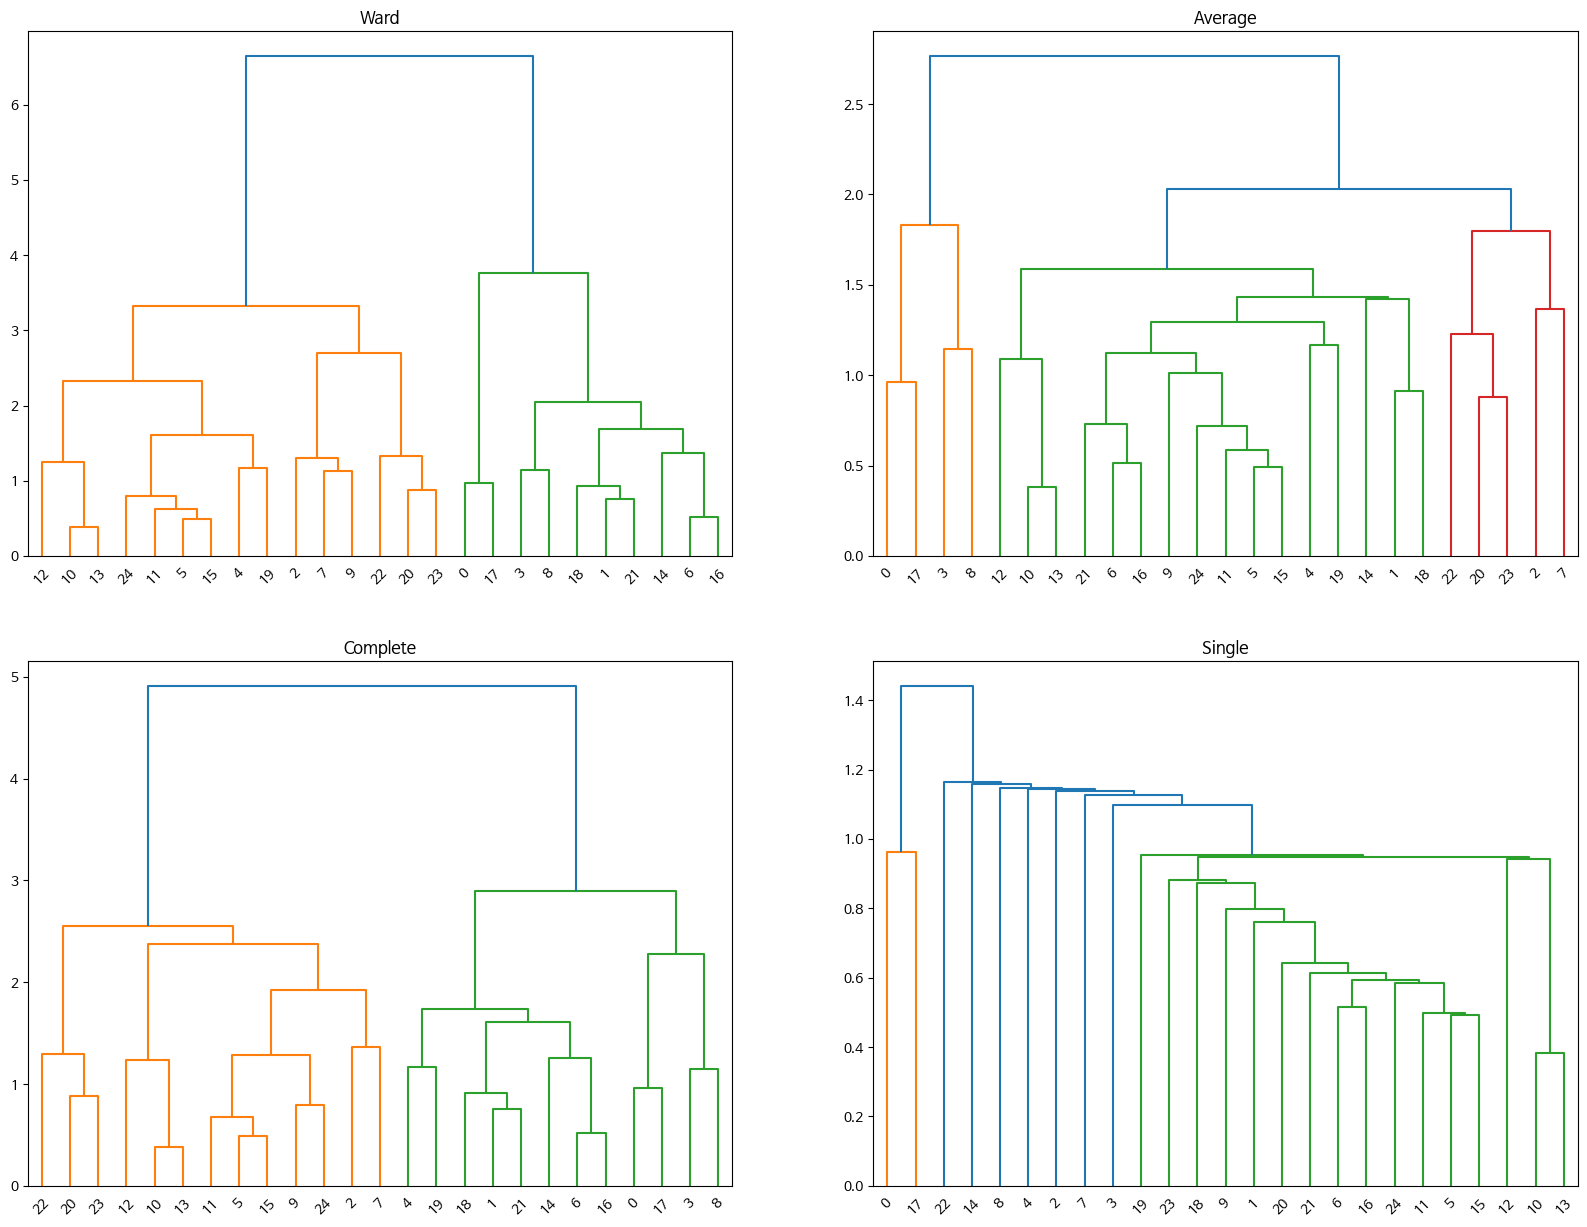

In [42]:
### 필요한 라이브러리 준비
import scipy
import scipy.cluster.hierarchy as sch

### dendrogram 그리기
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Ward')
link1 = sch.linkage(fish_trans.iloc[:,1:],method = 'ward')
dend1 = sch.dendrogram(link1)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Average')
link2 = sch.linkage(fish_trans.iloc[:,1:],method = 'average')
dend2 = sch.dendrogram(link2)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Complete')
link3 = sch.linkage(fish_trans.iloc[:,1:],method = 'complete')
dend3 = sch.dendrogram(link3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Single')
link4 = sch.linkage(fish_trans.iloc[:,1:],method = 'single')
dend4 = sch.dendrogram(link4)

plt.show()

- **Complete 연결법**이 군집을 가장 잘 군집을 잘 분류한다고 판단된다.

### **4-2. 병합 군집 수행**
- **complete** 병합 방식 활용
- 군집의 개수를 **2개**로 설정

In [43]:
### 필요한 라이브러리 import
from sklearn.cluster import AgglomerativeClustering

### 군집화(병합 군집)
agg = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
cluster_labels = agg.fit_predict(fish_trans.iloc[:,1:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


In [44]:
### 각 행정동이 어느 군집에 속하는지 확인

fish_trans['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1]

25


In [45]:
### 군집화 결과 확인

df_result = fish_trans.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    12
1    13
Name: 행정구, dtype: int64


In [46]:
### 시각화
# 평면에 시각화를 위해 추가적인 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_trans.iloc[:,1:-1])

fish_trans['pca_x'] = pca_transformed[:,0]
fish_trans['pca_y'] = pca_transformed[:,1]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5,cluster,pca_x,pca_y
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437,0,2.348132,-0.894963
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195,0,0.998368,0.543481
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125,1,-1.053441,0.590709


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


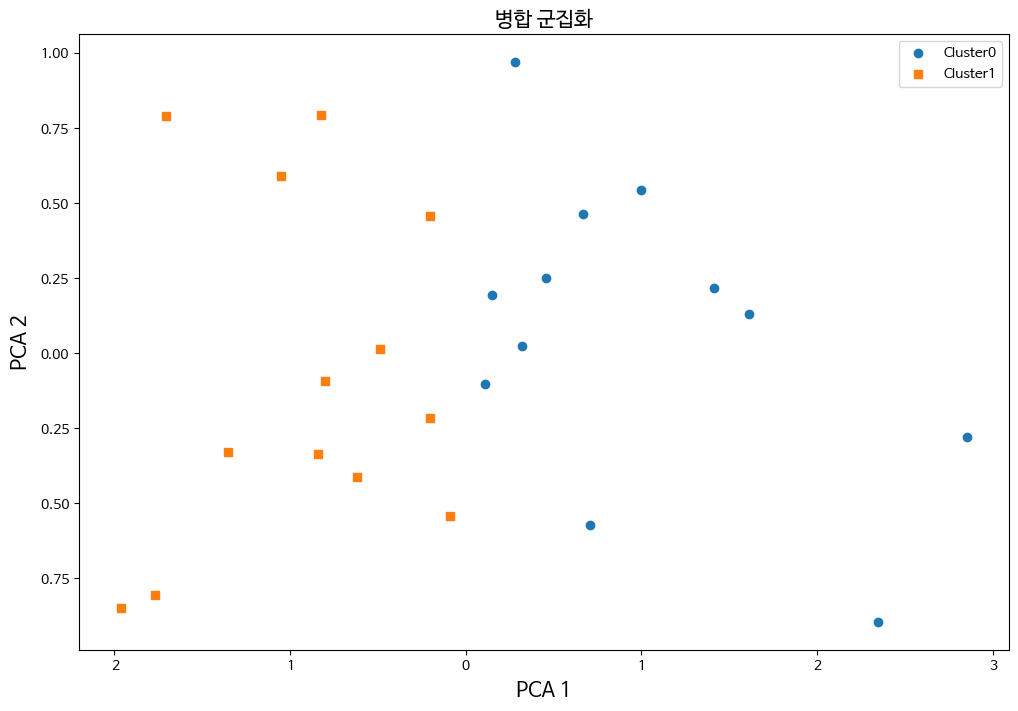

In [47]:
### 군집별 산점도 출력

# 군집 값이 0, 1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_trans[fish_trans['cluster'] == 0].index
marker1_ind = fish_trans[fish_trans['cluster'] == 1].index

# 군집 값 0, 1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = fish_trans.loc[marker0_ind,'pca_x'],y = fish_trans.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_trans.loc[marker1_ind,'pca_x'],y = fish_trans.loc[marker1_ind,'pca_y'], marker='s')

plt.legend(['Cluster0','Cluster1'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('병합 군집화',size = 15)
plt.show()

In [48]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_trans.loc[fish_trans['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(fish_trans.loc[fish_trans['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))
print()

군집0: ['강남구', '강동구', '강서구', '관악구', '구로구', '노원구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구']

군집1: ['강북구', '광진구', '금천구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '용산구', '종로구', '중구', '중랑구']



### **4-3. 군집화 평가**

#### **a) 실루엣 계수**

In [49]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(fish_trans.iloc[:,1:-3],fish_trans['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
fish_trans['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
fish_trans.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.302


cluster
0    0.244773
1    0.354568
Name: silhouette_coef, dtype: float64

- 전체 실루엣 계수의 평균값이 낮은 편이다.

#### **b) Davies Bouldin Index**

In [50]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.969


# **5. GMM**

In [51]:
### 필요한 라이브러리 import

from sklearn.mixture import GaussianMixture

In [52]:
### 데이터 다시 준비

fish_trans = fish_trans.iloc[:,:7]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


### **5-1. 군집 개수 선택**

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


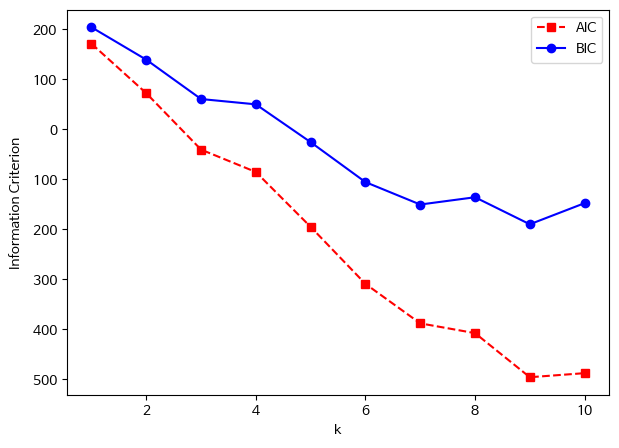

In [53]:
### AIC,BIC
# 군집 개수(k)를 1 ~ 10까지 조정하며 적정 클러스터 개수 찾기

gmm_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state = 0).fit(fish_trans.iloc[:,1:]) for k in range(1,11)]

bics = [model.bic(fish_trans.iloc[:,1:]) for model in gmm_per_k] # 모델별 bic
aics = [model.aic(fish_trans.iloc[:,1:]) for model in gmm_per_k] # 모댈별 aic

plt.figure(figsize = (7,5))
plt.plot(range(1,11),aics,'rs--')
plt.plot(range(1,11),bics,'bo-')
plt.xlabel('k')
plt.ylabel('Information Criterion')
plt.legend(['AIC','BIC'])
plt.show()

- **k = 6**이 최선의 선택으로 보인다.

### **5-2. GMM 군집화 수행**

In [54]:
### 군집화 수행

gmm = GaussianMixture(n_components = 6, random_state = 0).fit(fish_trans.iloc[:,1:])
gmm_cluster_labels = gmm.predict(fish_trans.iloc[:,1:])
print('cluster labels 유형: ',np.unique(gmm_cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


In [55]:
### 각 행정동이 어느 군집에 속하는지 확인

fish_trans['cluster'] = gmm_cluster_labels
print(gmm_cluster_labels)
print()
print(len(gmm_cluster_labels))

[3 1 2 1 1 4 1 2 1 2 0 4 0 0 1 4 1 3 1 4 5 1 5 5 4]

25


In [56]:
### 군집화 결과 확인

df_result = fish_trans.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    3
1    9
2    3
3    2
4    5
5    3
Name: 행정구, dtype: int64


In [57]:
### 시각화
# 평면에 시각화를 위해 추가적인 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_trans.iloc[:,1:-1])

fish_trans['pca_x'] = pca_transformed[:,0]
fish_trans['pca_y'] = pca_transformed[:,1]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5,cluster,pca_x,pca_y
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437,3,2.348132,-0.894963
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195,1,0.998368,0.543481
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125,2,-1.053441,0.590709


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


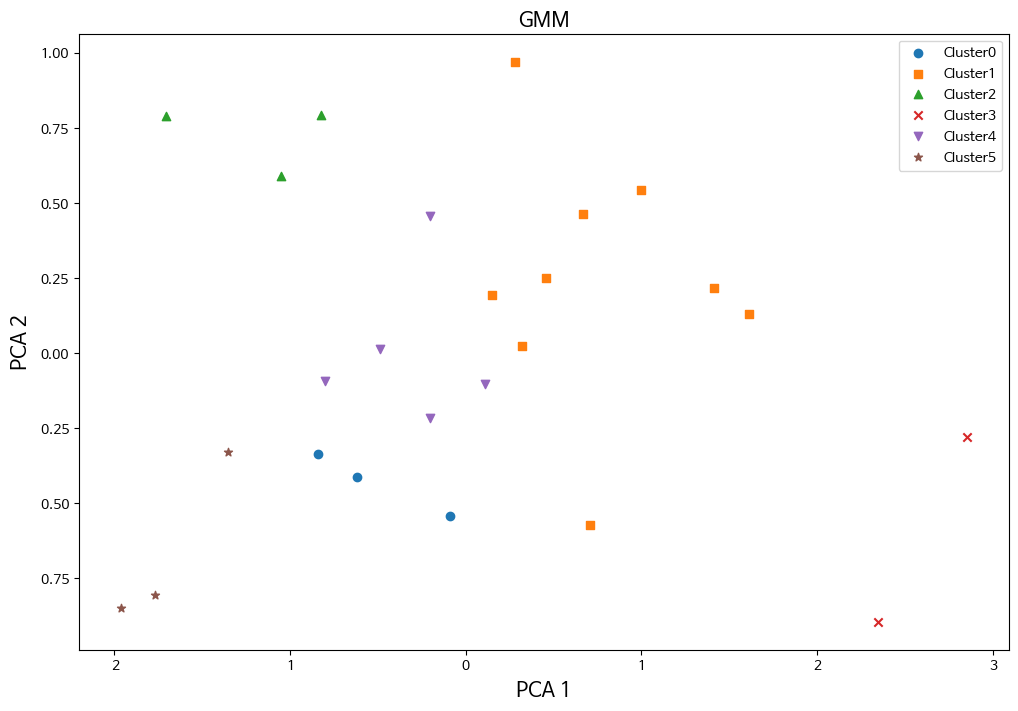

In [58]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2, 3, 4, 5인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_trans[fish_trans['cluster'] == 0].index
marker1_ind = fish_trans[fish_trans['cluster'] == 1].index
marker2_ind = fish_trans[fish_trans['cluster'] == 2].index
marker3_ind = fish_trans[fish_trans['cluster'] == 3].index
marker4_ind = fish_trans[fish_trans['cluster'] == 4].index
marker5_ind = fish_trans[fish_trans['cluster'] == 5].index

# 군집 값 0, 1, 2, 3, 4, 5에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = fish_trans.loc[marker0_ind,'pca_x'],y = fish_trans.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_trans.loc[marker1_ind,'pca_x'],y = fish_trans.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_trans.loc[marker2_ind,'pca_x'],y = fish_trans.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = fish_trans.loc[marker3_ind,'pca_x'],y = fish_trans.loc[marker3_ind,'pca_y'], marker='x')
plt.scatter(x = fish_trans.loc[marker4_ind,'pca_x'],y = fish_trans.loc[marker4_ind,'pca_y'], marker='v')
plt.scatter(x = fish_trans.loc[marker5_ind,'pca_x'],y = fish_trans.loc[marker5_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('GMM',size = 15)
plt.show()

In [59]:
### 각 군집에 해당하는 행정동 확인하기

group0 = list(fish_trans.loc[fish_trans['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(fish_trans.loc[fish_trans['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))
print()

group2 = list(fish_trans.loc[fish_trans['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))
print()

group3 = list(fish_trans.loc[fish_trans['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))
print()

group4 = list(fish_trans.loc[fish_trans['cluster'] == 4,'행정구'])
print("군집4: "+ str(group4))
print()

group5 = list(fish_trans.loc[fish_trans['cluster'] == 5,'행정구'])
print("군집5: "+ str(group5))

군집0: ['동대문구', '마포구', '서대문구']

군집1: ['강동구', '강서구', '관악구', '구로구', '노원구', '서초구', '성북구', '양천구', '은평구']

군집2: ['강북구', '금천구', '도봉구']

군집3: ['강남구', '송파구']

군집4: ['광진구', '동작구', '성동구', '영등포구', '중랑구']

군집5: ['용산구', '종로구', '중구']


### **5-3. 군집화 평가**

- 가우시안 혼합에서는 클러스터가 타원형이며 크기가 다르므로 관성(이너셔)이나 실루엣 점수를 사용하기 힘들다.
    > Davies-Boudlin Index만을 활용

#### **Davies Bouldin Index**

In [60]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_trans.iloc[:,1:-3],fish_trans['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.954


# **6. 베이즈 가우시안 혼합 모델**

### **6-1. 베이즈 가우시안 군집화 수행**

In [61]:
### 필요한 라이브러리 import

from sklearn.mixture import BayesianGaussianMixture

In [62]:
### 데이터 다시 준비

fish_trans = fish_trans.iloc[:,:7]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


In [63]:
### 군집화 수행

bgm = BayesianGaussianMixture(n_components = 25, n_init = 10,random_state = 0)
bgm.fit(fish_trans.iloc[:,1:])
print(np.round(bgm.weights_,2))

# 최적 클러스터 개수 확인
n_clusters_ = (np.round(bgm.weights_,2) > 0).sum()
n_clusters_

[0.3  0.07 0.03 0.1  0.06 0.06 0.05 0.07 0.07 0.04 0.03 0.03 0.02 0.03
 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


16

- 최적의 군집 개수로 **16개**가 선택됨
- 이하 생략..

# **7. DBSCAN**

### **7-1. 최적 파라미터 탐색**

In [64]:
### 필요한 라이브러리 import

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [65]:
### 데이터 다시 준비

fish_trans = fish_trans.iloc[:,:7]
fish_trans.head(3)

,행정구,일식/수산물,var1,var2,var3,var4,var5
0,강남구,1.000000,2.270909,-0.759256,-0.655710,0.304825,-0.287437
1,강동구,0.407892,0.996978,0.588062,-0.260018,0.217132,-0.384195
2,강북구,0.065525,-1.026326,0.571198,0.438008,0.739004,-0.365125


#### **✔ Eps 구하기**

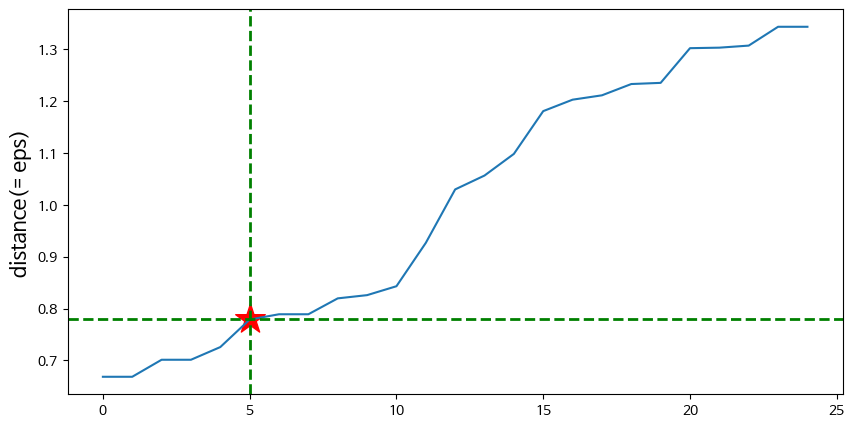

In [66]:
### K-dist 계산
# 유클리디안(euclidean) 거리

neigh = NearestNeighbors(n_neighbors = 2) # 두 개의 데이터, 1개의 거리
nbrs = neigh.fit(fish_norm.iloc[:,1:])
# 각 개체마다 거리를 계산해서 거리와 그 떄의 index 반환
distances, indices = nbrs.kneighbors(fish_norm.iloc[:,1:]) 

# 거리 정렬
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

### Plotting
plt.figure(figsize = (10,5))
plt.plot(distances)
plt.axvline(x = 5, color = 'g', lw = 2, ls='--')
plt.axhline(y = 0.78, color = 'g', lw = 2, ls='--')
plt.scatter(5,0.78,marker = '*',color = 'r',s = 500)
plt.ylabel('distance(= eps)',fontsize = 15)
plt.show()

- 급격히 dist가 증가한 지점의 distance인 **0.78**을 **eps**로 설정

### **7-2. DBSCAN 군집화 수행**

- eps = 0.78
- min_points를 2로 설정
- min_sample = 3(min points + 1)

In [67]:
### DBSCAN 군집화 수행

dbscan = DBSCAN(eps = 0.78, min_samples = 3, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(fish_trans.iloc[:,1:])
print('cluster labels 유형: ',np.unique(dbscan_labels))

cluster labels 유형:  [-1  0]


- 단일 군집으로 군집화되는 것을 확인할 수 있다.
- 이하 생략..

# **8. 결과 정리**

In [69]:
result = [['K-Means',0.246,0.826],
         ['평균 이동',0.389,0.685],
         ['병합 군집',0.302,0.969],
         ['GMM','-',0.954],
         ['베이즈 가우시안','-','-'],
         ['DBSCAN','-','-']]
cols = ['Algorithm','실루엣 점수','DBI']
result_df = pd.DataFrame(result,columns = cols)
result_df.sort_values(by = ['실루엣 점수','DBI'],ascending = [False, True]).reset_index(drop = True)

,Algorithm,실루엣 점수,DBI
0,GMM,-,0.954
1,베이즈 가우시안,-,-
2,DBSCAN,-,-
3,평균 이동,0.389,0.685
4,병합 군집,0.302,0.969
5,K-Means,0.246,0.826


- **병합 군집** 군집화 방법이 가장 유의미한 결과를 보인다.